In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# For Fairness Threshold = 1000

In [95]:
with open('focops_results/focops_baseline_0_HalfCheetah-v4_log_data_seed_0.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_baseline_1_BigFootHalfCheetah_log_data_seed_0.pkl', 'rb') as f:
    group1 = pickle.load(f)

In [87]:
group0_avgr_ten_seeds = []

group1_avgr_ten_seeds = []

for i in range(10):
    with open('focops_results/focops_baseline_1_BigFootHalfCheetah_log_data_seed_'+str(i)+'.pkl', 'rb') as f:
        group1 = pickle.load(f)['AvgR'][:800]
        
    smoothed_data = [np.mean(group1[i:i+10]) for i in range(0, len(group1), 10)]
    group1_avgr_ten_seeds.append(smoothed_data)

for i in range(10):
    with open('focops_results/focops_baseline_0_HalfCheetah-v4_log_data_seed_'+str(i)+'.pkl', 'rb') as f:
        group0 = pickle.load(f)['AvgR'][:800]
        
    smoothed_data = [np.mean(group0[i:i+10]) for i in range(0, len(group0), 10)]
    group0_avgr_ten_seeds.append(smoothed_data)

In [88]:
baseline0_max = np.max(group0_avgr_ten_seeds, axis=0)
baseline0_min = np.min(group0_avgr_ten_seeds, axis=0)
baseline0_mean = np.mean(group0_avgr_ten_seeds, axis=0)

baseline1_max = np.max(group1_avgr_ten_seeds, axis=0)
baseline1_min = np.min(group1_avgr_ten_seeds, axis=0)
baseline1_mean = np.mean(group1_avgr_ten_seeds, axis=0)

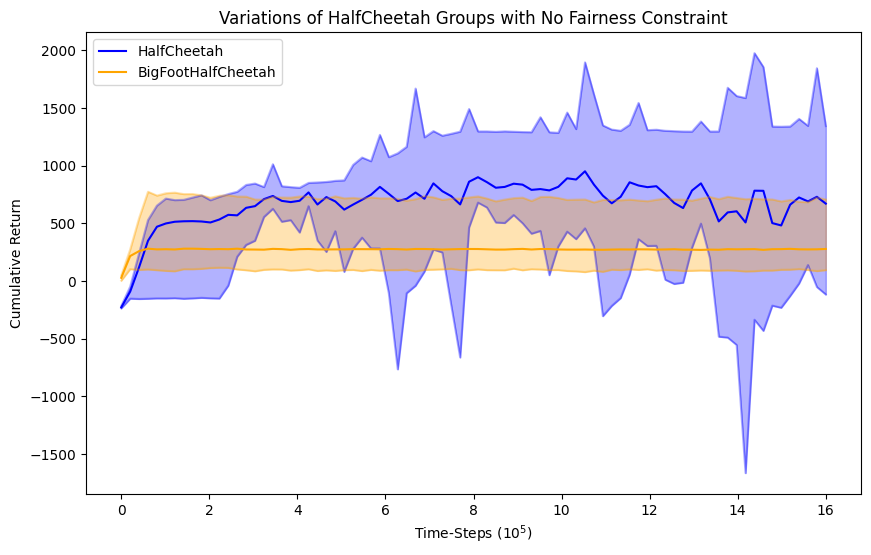

In [89]:
x = np.linspace(0, 16, 80)

plt.figure(figsize=(10, 6))
plt.plot(x, baseline0_max, color='blue', alpha=0.3)
plt.plot(x, baseline0_min, color='blue', alpha=0.3)
plt.fill_between(x, baseline0_max, baseline0_min, color='blue', alpha=0.3)

plt.plot(x, baseline0_mean, label='HalfCheetah', color='blue', alpha=1)


plt.plot(x, baseline1_max,  color='orange', alpha=0.3)
plt.plot(x, baseline1_min, color='orange', alpha=0.3)
plt.fill_between(x, baseline1_max, baseline1_min, color='orange', alpha=0.3)

plt.plot(x, baseline1_mean, label='BigFootHalfCheetah', color='orange', alpha=1)

# Add some labels and a legend
plt.xlabel('Time-Steps ($10^5$)')
plt.ylabel('Cumulative Return')
plt.title('Variations of HalfCheetah Groups with No Fairness Constraint')
plt.legend()


# Show the plot
plt.show()

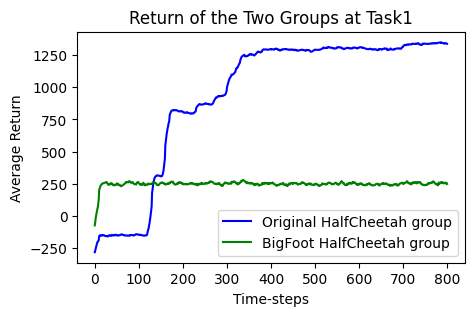

In [96]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR'][:800],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR'][:800],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

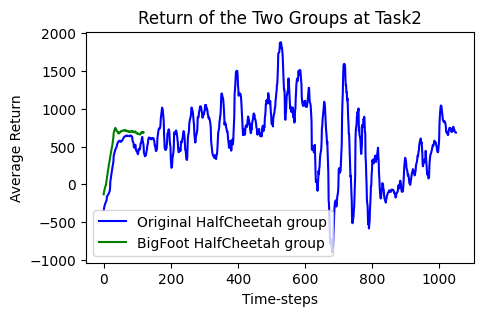

In [9]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [87]:
g0 = pd.DataFrame()
g0['time'] = group0['time']
g0['group0 AvgR1'] = group0['AvgR']
g0['group0 AvgR2'] = group0['AvgR2']

g1 = pd.DataFrame()
g1['time'] = group1['time']
g1['group1 AvgR1'] = group1['AvgR']
g1['group1 AvgR2'] = group1['AvgR2']

all_groups = pd.concat([g0, g1]).sort_values('time').reset_index()

# forward fill the first group and backward fill the second group
# (because the second group starts with Nan values).
all_groups['group0 AvgR1'] = all_groups['group0 AvgR1'].fillna(method='ffill')
all_groups['group1 AvgR1'] = all_groups['group1 AvgR1'].fillna(method='bfill').fillna(method='ffill')

all_groups['group0 AvgR2'] = all_groups['group0 AvgR2'].fillna(method='ffill')
all_groups['group1 AvgR2'] = all_groups['group1 AvgR2'].fillna(method='bfill').fillna(method='ffill')

all_groups['group fairness gap AvgR1'] = np.abs(all_groups['group0 AvgR1'] - all_groups['group1 AvgR1'])
all_groups['group fairness gap AvgR2'] = np.abs(all_groups['group0 AvgR2'] - all_groups['group1 AvgR2'])

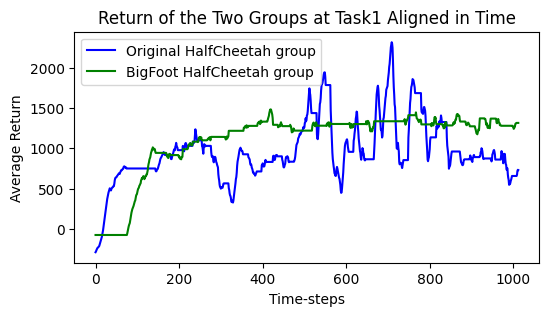

In [91]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR1'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR1'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1 Aligned in Time")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

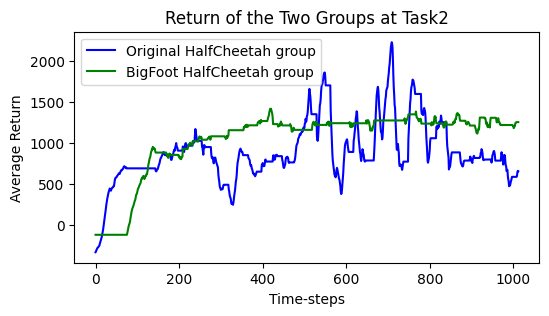

In [89]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

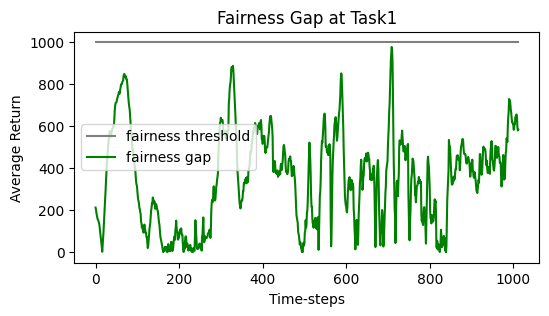

In [90]:
plt.figure(figsize=(6, 3))

plt.plot([1000]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR1'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()



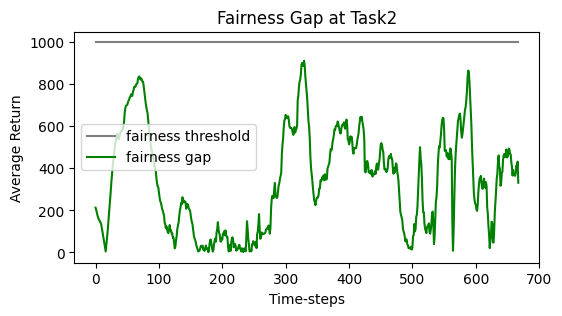

In [83]:
plt.figure(figsize=(6, 3))

plt.plot([1000]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR2'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()



# For Fairness Threshold = 100

In [107]:
with open('focops_results/focops_group fairness_0_HalfCheetah-v4_log_data_seed_0.pkl', 'rb') as f:
    group0 = pickle.load(f)
with open('focops_results/focops_group fairness_1_BigFootHalfCheetah_log_data_seed_0.pkl', 'rb') as f:
    group1 = pickle.load(f)

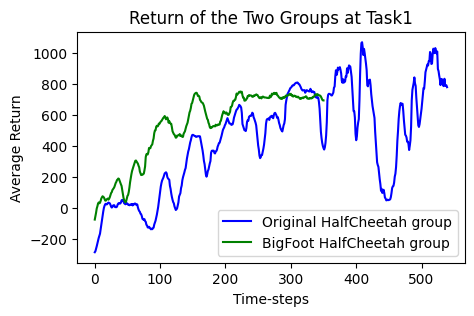

In [108]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

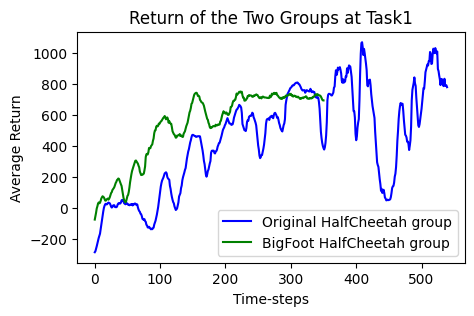

In [109]:
plt.figure(figsize=(5, 3))

plt.plot(group0['AvgR'],label='Original HalfCheetah group', color='blue')
plt.plot(group1['AvgR'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

In [110]:
g0 = pd.DataFrame()
g0['time'] = group0['time']
g0['group0 AvgR1'] = group0['AvgR']
g0['group0 AvgR2'] = group0['AvgR2']

g1 = pd.DataFrame()
g1['time'] = group1['time']
g1['group1 AvgR1'] = group1['AvgR']
g1['group1 AvgR2'] = group1['AvgR2']

all_groups = pd.concat([g0, g1]).sort_values('time').reset_index()

# forward fill the first group and backward fill the second group
# (because the second group starts with Nan values).
all_groups['group0 AvgR1'] = all_groups['group0 AvgR1'].fillna(method='ffill')
all_groups['group1 AvgR1'] = all_groups['group1 AvgR1'].fillna(method='bfill').fillna(method='ffill')

all_groups['group0 AvgR2'] = all_groups['group0 AvgR2'].fillna(method='ffill')
all_groups['group1 AvgR2'] = all_groups['group1 AvgR2'].fillna(method='bfill').fillna(method='ffill')

all_groups['group fairness gap AvgR1'] = np.abs(all_groups['group0 AvgR1'] - all_groups['group1 AvgR1'])
all_groups['group fairness gap AvgR2'] = np.abs(all_groups['group0 AvgR2'] - all_groups['group1 AvgR2'])

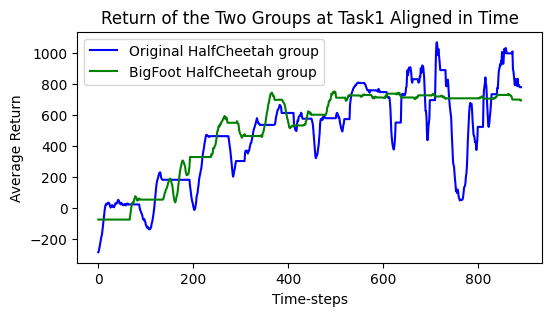

In [111]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR1'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR1'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task1 Aligned in Time")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

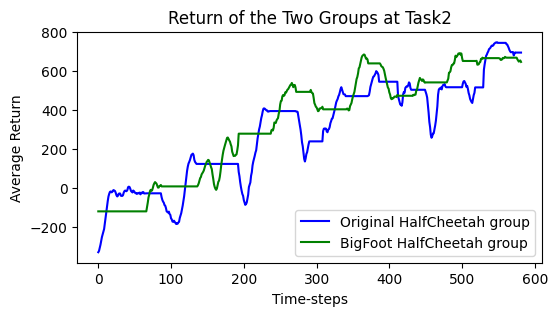

In [104]:
plt.figure(figsize=(6, 3))

plt.plot(all_groups['group0 AvgR2'],label='Original HalfCheetah group', color='blue')
plt.plot(all_groups['group1 AvgR2'],label='BigFoot HalfCheetah group', color='green')

plt.title("Return of the Two Groups at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

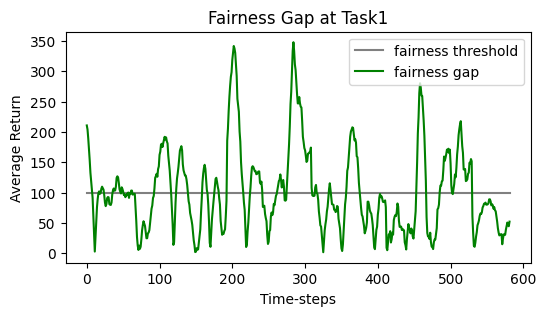

In [105]:
plt.figure(figsize=(6, 3))

plt.plot([100]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR1'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task1")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()



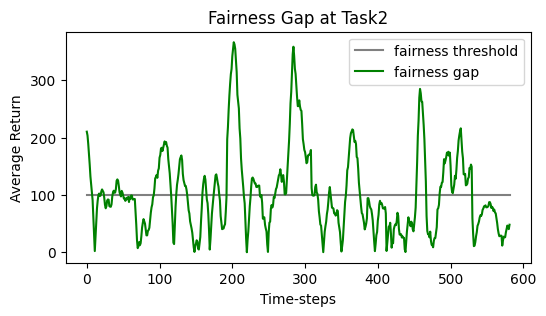

In [106]:
plt.figure(figsize=(6, 3))

plt.plot([100]*len(all_groups), label='fairness threshold', color='grey')
plt.plot(all_groups['group fairness gap AvgR2'], label='fairness gap', color='green')

plt.title("Fairness Gap at Task2")
plt.xlabel('Time-steps')
plt.ylabel('Average Return')
plt.legend()

